In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
#This set of imports is similar to those in the linear example, except it imports one more thing. Now we can use a dataset directly from the Scikit-learn library.

In [4]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)
#The next step is to take a look at what this raw data looks like with a plot.


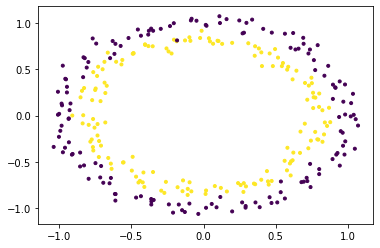

In [5]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [6]:
#Now that you can see how the data are separated, we can choose a non-linear SVM to start with. This dataset doesn't need any pre-processing before we use it to train the model, so we can skip that step. Here's how the SVM model will look for this:

In [7]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)
#In this case, we'll go with an RBF (Gaussian Radial Basis Function) kernel to classify this data. You could also try the polynomial kernel to see the difference between the results you get. Now it's time to train the model.

In [8]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)
#You can start labeling new data in the correct category based on this model. To see what the decision boundary looks like, we'll have to make a custom function to plot it.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
#You have everything you need to plot the decision boundary for this non-linear data. We can do that with a few lines of code that use the Matlibplot library, just like the other plots.


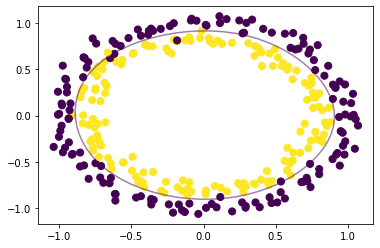

In [10]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()